# Angular Inflation with Anguelova

In [1]:
import sympy
import numpy as np
from einsteinpy.symbolic import MetricTensor, RicciScalar

#import inflatox
import inflatox

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

#A4 tufte layout paper figure sizes
MARGIN_FIG = lambda scale: (1.99, 1.99*scale)
MAIN_FIG = lambda scale: (4.18, 4.18*scale)
FULL_FIG = lambda scale: (6.64, 6.64*scale)

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', family='JetBrains Mono')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Other matplotlib configuration
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Fira Code'
plt.rcParams['mathtext.it'] = 'Fira Code'
plt.ioff()

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


⎡      6⋅α                         ⎤
⎢────────────────         0        ⎥
⎢               2                  ⎥
⎢⎛   2    2    ⎞                   ⎥
⎢⎝- χ  - φ  + 1⎠                   ⎥
⎢                                  ⎥
⎢                        6⋅α       ⎥
⎢       0          ────────────────⎥
⎢                                 2⎥
⎢                  ⎛   2    2    ⎞ ⎥
⎣                  ⎝- χ  - φ  + 1⎠ ⎦

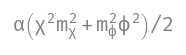

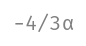

In [3]:
sympy.init_printing()
#setup the coordinates
p, x = sympy.symbols("phi chi")
coords = [p, x]
d = len(coords)

#setup the potential
mp, mx, a = sympy.symbols("m_phi m_chi alpha")
V = a/2 * ( (mp*p)**2 + (mx*x)**2 ).nsimplify()

#setup the metric
metric_diagonal = 6*a / (1 - p**2 - x**2)**2
metric = [[0 for i in range(2)] for i in range(2)]
metric[0][0] = metric_diagonal
metric[1][1] = metric_diagonal
metric = MetricTensor(metric, coords)
R = RicciScalar.from_metric(metric).simplify()

#display the metric and potential
display(metric.tensor(), V, R)

In [4]:
hesse = inflatox.SymbolicCalculation.new(
  coords,
  metric,
  V,
  assertions=False,
  simplification_depth=1,
  silent=True
).execute([[0,1]])

Calculating covariant Hesse matrix...
Projecting the Hesse matrix on the vielbein basis...


In [5]:
out = inflatox.Compiler(hesse).compile()
out.print_sym_lookup_table()

[Symbol Dictionary]
phi -> x[0]
chi -> x[1]
alpha -> args[0]
m_chi -> args[1]
m_phi -> args[2]


In [6]:
from inflatox.consistency_conditions import AnguelovaLazaroiuCondition
anguelova = AnguelovaLazaroiuCondition(out)

a = 1/600
m_phi = 2e-5
m_chi = m_phi * np.sqrt(9)
args = np.array([a, m_chi, m_phi])

In [7]:
p_start, p_stop = -15.0, 15.0
x_start, x_stop = -5.0, 5.0
N = 5000

pot_calc = anguelova.calc_V_array(
  args,
  [p_start, x_start],
  [p_stop, x_stop],
  [N, N]
)

/tmp/ipykernel_28905/1776079123.py:29: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist=12


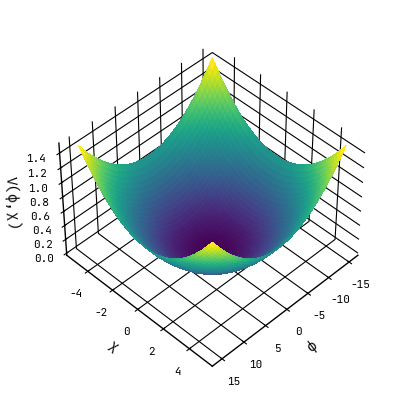

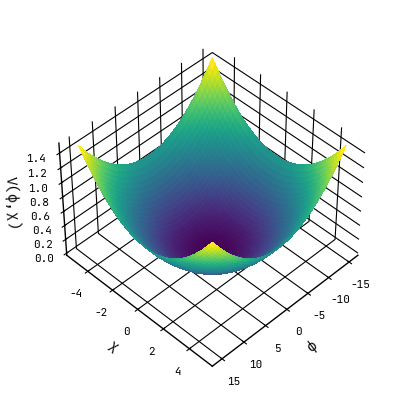

In [8]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=MAIN_FIG(1))
rs = np.linspace(p_start, p_stop, N)
θs = np.linspace(x_start, x_stop, N)

ax.plot_surface(
  *np.meshgrid(rs, θs),
  np.transpose(pot_calc),
  linewidth=0,
  antialiased=False,
  cmap='viridis'
)

ax.set_xlabel(f'${sympy.latex(coords[0])}$')
ax.set_ylabel(f'${sympy.latex(coords[1])}$')
ax.set_zlabel(f'$V({sympy.latex(coords[0])},{sympy.latex(coords[1])})$')



wit, zwart = (1.0, 1.0, 1.0, 0.0), (0.0, 0.0, 0.0, 1.0)
ax.xaxis.set_pane_color(wit)
ax.yaxis.set_pane_color(wit)
ax.zaxis.set_pane_color(wit)

ax.xaxis._axinfo["grid"]['color'] = zwart
ax.yaxis._axinfo["grid"]['color'] = zwart
ax.zaxis._axinfo["grid"]['color'] = zwart

ax.view_init(45, 45)
ax.dist=12

fig.savefig('../out/angularpot.svg', transparent=True)
fig

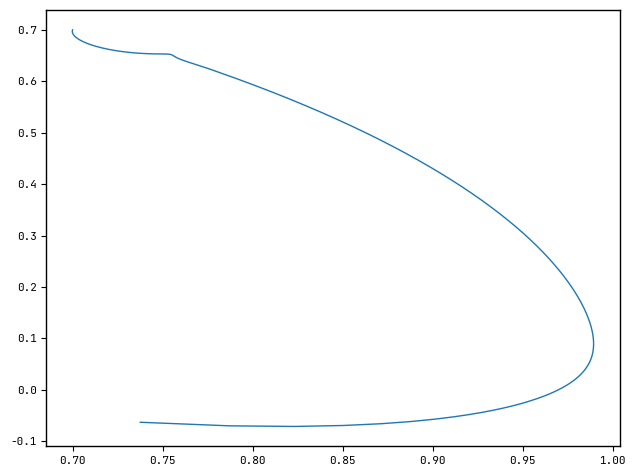

In [20]:
phix = np.load('/home/raulwolters/GitClones/PyTransportSU/output_angular/background/phix.npy')
phiy = np.load('/home/raulwolters/GitClones/PyTransportSU/output_angular/background/phiy.npy')
plt.plot(phix, phiy)

In [67]:
extent = (0.69, 1.0, -0.1, 0.8)
array1 = anguelova.evaluate(args, *extent)
array2 = anguelova.evaluate(args, *extent, order='leading')

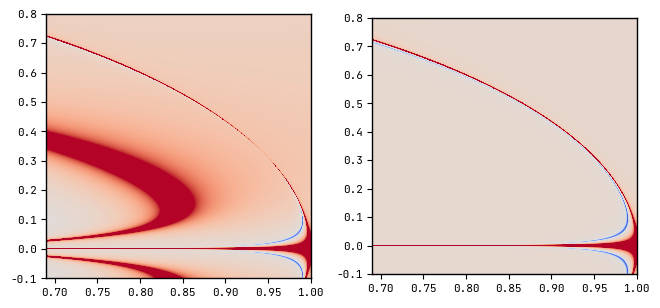

In [68]:
two_norm = mpl.colors.TwoSlopeNorm(0.25, vmax=10)
cmap = mpl.colormaps['coolwarm'].copy()
cmap.set_over(cmap(1.0))
cmap.set_bad(cmap(1.0))

fig, (ax1, ax2) = plt.subplots(1,2,
  figsize=FULL_FIG(0.5),
  width_ratios=[1, 1]
)

img1 = ax1.imshow(
  np.transpose(array1),
  extent = extent,
  cmap = cmap,
  norm = two_norm,
  origin = 'lower',
  aspect = 0.31/0.9
)

img2 = ax2.imshow(
  np.transpose(array2),
  extent = extent,
  cmap = cmap,
  norm = two_norm,
  origin = 'lower',
  aspect = 0.3/0.9
)

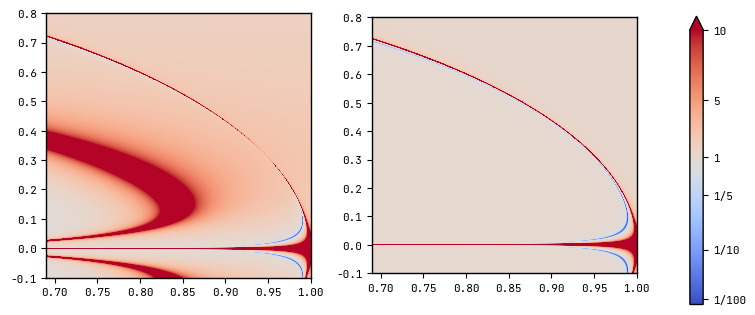

<Figure size 640x480 with 0 Axes>

In [69]:
cax = fig.add_axes([
  ax.get_position().x1 + 0.08,
  ax.get_position().y0 - 0.1,
  0.02,
  ax.get_position().height + 0.11
])

cbar = plt.colorbar(
  img2,
  extend='max',
  location='right',
  ticks=[1/100, 1/10, 1/5, 1, 5, 10],
  cax=cax
)
cax.set_yticklabels(['1/100','1/10','1/5', '1', '5', '10'])

fig

In [70]:
exit = 3997

for ax in [ax1, ax2]:
  ax.plot(phix, phiy, color='black')
  ax.scatter([phix[0], phix[-1], phix[exit]], [phiy[0], phiy[-1], phiy[exit]], color='black')

ax2.plot(phix, phiy, color='black')
ax1.plot(phix, phiy, color='black')

/tmp/ipykernel_28905/1328595315.py:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('../out/angular_with_eom.svg', transparent=True, bbox_inches="tight", pad_inches=0.05)


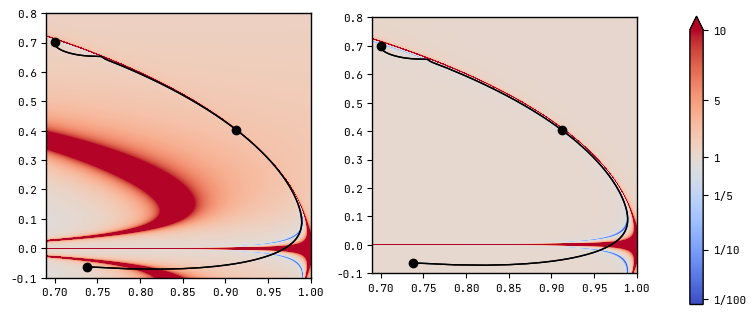

In [71]:
fig.savefig('../out/angular_with_eom.svg', transparent=True, bbox_inches="tight", pad_inches=0.05)
fig